In [1]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

In [2]:
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=100000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

In [3]:
def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

<IPython.core.display.Javascript object>


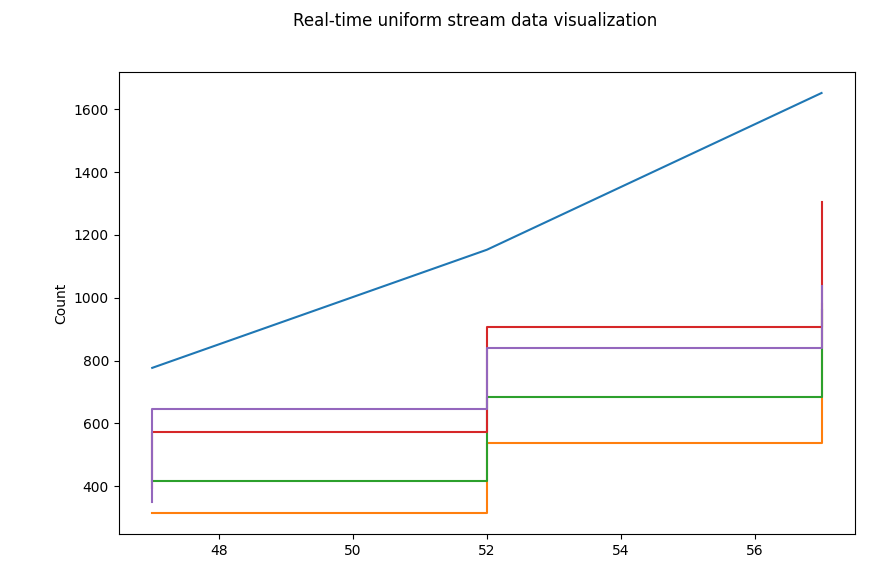

KeyboardInterrupt: 

In [4]:
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'Assignment2B-process'

def consume_messages(consumer,fig,ax):
    try:
        # container for x and y values
        x, y4, y5, y6, y7, y8 = [], [], [],[],[],[]   
        count_machine_dict = {4:0,5:0,6:0,7:0,8:0}
        for message in consumer:   
            event_time=""
            for data in list(message.value):
                row = eval(str(data))
                event_time = data['ts']
                machineNo = data['machine']
                count_machine_dict[machineNo] += 1
            #Append data points
            x.append(event_time)
            y4.append(count_machine_dict[4])
            y5.append(count_machine_dict[5])
            y6.append(count_machine_dict[6])
            y7.append(count_machine_dict[7])
            y8.append(count_machine_dict[8])

            if len(x) > 12: #update chart in every 12 msg i.e number of records arriving in 2 min
#                 print('inside if condition')
                ax.clear()
#                 print(y4)
                ax.plot(x,y4)
                ax.plot(x,y5)
                ax.plot(x,y6)
                ax.plot(x,y7)
                ax.plot(x,y8)
                
                
                ax.set_xlabel('Time')
                ax.set_ylabel('Count')
                fig.canvas.draw()
#                 ax.set_ylim(0,110) 
#                 ax.set_yticks([0,20,40,60,80,100])
                
                x.pop(0) 
                y4.pop(0)
                y5.pop(0)
                y6.pop(0)
                y7.pop(0)
                y8.pop(0)
                
        plt.close('all')
    except Exception as ex:
        print(str(ex))
        
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer,fig,ax)        
    